In [1]:
%load_ext autoreload
%autoreload 2

# MM-Food-100K
[HuggingFace](https://huggingface.co/datasets/Codatta/MM-Food-100K)


**Columns**:
- **image_url**: A link to the image file.
- **dish_name**: The main category or dish name of the food, e.g., "Fried Eggs with Toast."
- **food_type**: Describes the source or context of the food, e.g., "Homemade food," "Restaurant food," etc.
- **ingredients**: A list of the food's ingredients, e.g., ["eggs", "bread", "olive oil"], which provides the basis for ingredient recognition.
- **portion_size**: The estimated weight of each major ingredient, e.g., ["eggs:100g", "bread:50g"]. This is crucial for precise nutritional estimation.
- **nutritional_profile**: Detailed nutritional information presented in JSON format, including calories_kcal (calories), protein_g (protein), fat_g (fat), and carbohydrate_g (carbohydrates).
- **cooking_method**: The method used to cook the food, e.g., "Frying" or "Stir-frying," which is essential for understanding the food preparation process.
- **camera_or_phone_prob** & **online_download_prob**: Probability values indicating the image source (user-taken photo vs. online download), which helps in assessing data authenticity.
- **food_prob**: A probability value indicating that the image contains food, ensuring the validity of the data.

In [3]:
import pandas as pd

# Login using e.g. `huggingface-cli login` to access this dataset
df = pd.read_csv("hf://datasets/Codatta/MM-Food-100K/MM-Food-100K.csv")

/Users/tashafahira/.pyenv/versions/3.10.6/envs/dine_venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df.head()

,image_url,camera_or_phone_prob,food_prob,dish_name,food_type,ingredients,portion_size,nutritional_profile,cooking_method,sub_dt
0,https://file.b18a.io/7843322356500104680_44354...,0.7,0.95,Fried Chicken,Restaurant food,"[""chicken"",""breading"",""oil""]","[""chicken:300g""]","{""fat_g"":25.0,""protein_g"":30.0,""calories_kcal""...",Frying,20250704
1,https://file.b18a.io/7833227147700100732_67487...,0.7,1.00,Pho,Restaurant food,"[""noodles"",""beef"",""basil"",""lime"",""green onions...","[""noodles:200g"",""beef:100g"",""vegetables:50g""]","{""fat_g"":15.0,""protein_g"":25.0,""calories_kcal""...",boiled,20250702
2,https://file.b18a.io/7832600581600103585_26423...,0.8,0.95,Pan-fried Dumplings,Restaurant food,"[""dumplings"",""chili oil"",""soy sauce""]","[""dumplings:300g"",""sauce:50g""]","{""fat_g"":15.0,""protein_g"":20.0,""calories_kcal""...",Pan-frying,20250625
3,https://file.b18a.io/7839056601700101188_98515...,0.7,1.00,Bananas,Raw vegetables and fruits,"[""Bananas""]","[""Bananas: 10 pieces (about 1kg)""]","{""fat_g"":3.0,""protein_g"":12.0,""calories_kcal"":...",Raw,20250718
4,https://file.b18a.io/7837642737500100261_17312...,0.8,0.90,Noodle Stir-Fry,Restaurant food,"[""noodles"",""chicken"",""vegetables"",""sauce""]","[""noodles:300g"",""chicken:100g"",""vegetables:50g""]","{""fat_g"":20.0,""protein_g"":25.0,""calories_kcal""...",stir-fried,20250711


In [5]:
df.shape

(100000, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   image_url             100000 non-null  object 
 1   camera_or_phone_prob  100000 non-null  float64
 2   food_prob             100000 non-null  float64
 3   dish_name             99998 non-null   object 
 4   food_type             100000 non-null  object 
 5   ingredients           100000 non-null  object 
 6   portion_size          100000 non-null  object 
 7   nutritional_profile   100000 non-null  object 
 8   cooking_method        98642 non-null   object 
 9   sub_dt                100000 non-null  int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 7.6+ MB


In [7]:
df.describe()


,camera_or_phone_prob,food_prob,sub_dt
count,100000.000000,100000.000000,1.000000e+05
mean,0.748389,0.937804,2.025069e+07
std,0.050751,0.047095,3.476099e+01
min,0.600000,0.800000,2.025062e+07
25%,0.700000,0.900000,2.025070e+07
50%,0.700000,0.900000,2.025071e+07
75%,0.800000,1.000000,2.025072e+07
max,0.900000,1.000000,2.025081e+07


In [8]:
df["food_type"].unique()

array(['Restaurant food', 'Raw vegetables and fruits', 'Homemade food',
       'Packaged food', 'Others'], dtype=object)

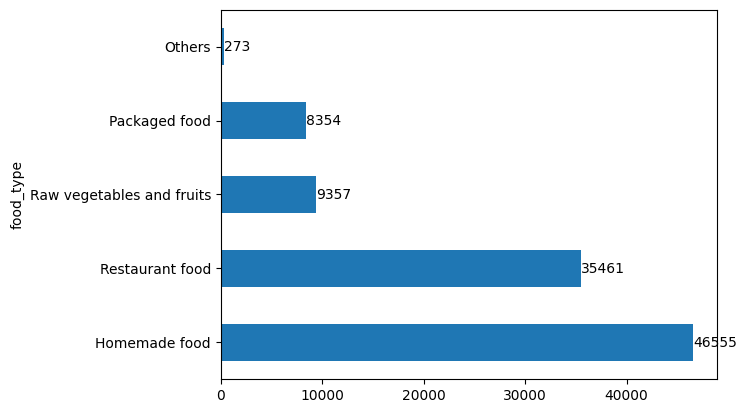

In [9]:
counts = df["food_type"].value_counts()
ax = counts.plot(kind="barh")
for i, v in enumerate(counts.values):
    ax.text(v, i, str(v), va="center")

In [10]:
# What info is in nutrional_profile?
df["nutritional_profile"][0]

'{"fat_g":25.0,"protein_g":30.0,"calories_kcal":400,"carbohydrate_g":15.0}'

## Is the nutrional profile complete?
Unnest the calories and PFC info dictionary
> **No Missing value**

In [11]:
nutrition = df["nutritional_profile"].copy()
type(nutrition)

pandas.core.series.Series

In [12]:
nutrition.head()

0    {"fat_g":25.0,"protein_g":30.0,"calories_kcal"...
1    {"fat_g":15.0,"protein_g":25.0,"calories_kcal"...
2    {"fat_g":15.0,"protein_g":20.0,"calories_kcal"...
3    {"fat_g":3.0,"protein_g":12.0,"calories_kcal":...
4    {"fat_g":20.0,"protein_g":25.0,"calories_kcal"...
Name: nutritional_profile, dtype: object

In [13]:
import json
nutrition = nutrition.apply(json.loads)
nutrition_df = pd.json_normalize(nutrition)
nutrition_df.head()

,fat_g,protein_g,calories_kcal,carbohydrate_g
0,25.0,30.0,400,15.0
1,15.0,25.0,450,60.0
2,15.0,20.0,400,50.0
3,3.0,12.0,1050,270.0
4,20.0,25.0,600,80.0


In [14]:
nutrition_df.isna().sum()

fat_g             0
protein_g         0
calories_kcal     0
carbohydrate_g    0
dtype: int64

# My Food Classes
I want Japanese food (min. 10 kinds)

In [15]:
df["dish_name"].nunique()

19288

In [16]:
df["dish_name"].unique()

array(['Fried Chicken', 'Pho', 'Pan-fried Dumplings', ...,
       'Mixed Skewers and Salad', 'Tofu with Dumplings', 'Fruit Powder'],
      shape=(19289,), dtype=object)

In [17]:
df['dish_name'].value_counts().head(10)

dish_name
Noodle Soup           1960
Dumplings             1236
Hot Pot                995
Stir-fried Noodles     796
Fried Chicken          712
Apple                  705
Watermelon             695
Fried Rice             612
Pizza                  609
Beef Noodle Soup       582
Name: count, dtype: int64

In [ ]:
# with open("unique_dishes.txt", "w") as f:
#     for dish in df["dish_name"].dropna().unique():
#         f.write(f"{dish}\n")

## Japanese food only
- Sushi - 312
- Ramen - 259
- Sushi Platter - 206
- Sashimi - 108
- Sashimi Platter - 87
- Sushi Rolls - 62
- Sushi and Sashimi Platter - 61
- Salmon Sashimi - 35
- Unagi Don - 31
- Sushi Roll - 28
- Edamame - 23
- Bento Box - 22
- Onigiri - 21
- Tonkatsu - 20
- Takoyaki - 18
- Tempura - 12
- Shabu-Shabu - 12
- Mochi - 12
- Sushi Bowl - 11
- Salmon Sushi - 11
- Okonomiyaki - 11
- Sushi and Sashimi - 10
- Matcha Latte - 10

In [20]:
# Sushi available?
len(df[df["dish_name"]=="Sushi"])

312

In [21]:
len(df[df['dish_name'] == 'Ramen'])

259

In [22]:
len(df[df['dish_name'] == 'Sushi Platter'])

206

In [23]:
len(df[df['dish_name'] == 'Sashimi'])

108

In [24]:
len(df[df['dish_name'] == 'Sashimi Platter'])

87

In [25]:
len(df[df['dish_name'] == 'Sushi Rolls'])

62

In [26]:
len(df[df['dish_name'] == 'Sushi and Sashimi Platter'])

61

In [27]:
len(df[df['dish_name'] == 'Salmon Sashimi'])

35

In [28]:
len(df[df['dish_name'] == 'Unagi Don'])

31

In [29]:
len(df[df['dish_name'] == 'Sushi Roll'])

28

In [30]:
len(df[df['dish_name'] == 'Edamame'])

23

In [31]:
len(df[df['dish_name'] == 'Bento Box'])

22

In [32]:
len(df[df['dish_name'] == 'Onigiri'])

21

In [33]:
len(df[df['dish_name'] == 'Rice Ball'])

2

## Top 30 Most Common Foods Eaten by Japanese People
| Dish | Number of Entries |
|---|---|
| Rice (Hakumai) | 1711 |
| Miso Soup | 7 |
| Onigiri | 21 |
| Tsukemono | 0 |
| Natto | 3 |
| Tofu | 690 |
| Tamagoyaki | 2 |
| Ramen | 259 |
| Udon | 17 |
| Soba | 33 |
| Yakisoba | 3 |
| Somen | 0 |
| Sushi | 312 |
| Sashimi | 108 |
| Unagi | 37 |
| Shirasu | 0 |
| Yakitori | 9 |
| Karaage | 2 |
| Tonkatsu | 20 |
| Gyudon | 16 |
| Shabu-Shabu | 15 |
| Yakiniku | 1 |
| Buta-no-Shogayaki | 0 |
| Edamame | 77 |
| Tempura | 49 |
| Gyoza | 6 |
| Okonomiyaki | 13 |
| Takoyaki | 20 |
| Bento | 36 |
| Curry Rice | 19 |

# Current label classes (Version 1)

```
dish_name
apple            500
fried chicken    500
pizza            500
sushi            312
ramen            259
mapo tofu        256
egg tart         251
sushi platter    209
boiled eggs      206
grilled steak    194
hamburger        184
oranges          176
```

In [40]:
len(df[df['dish_name'] == 'Sushi'])

312

---

In [1]:
import os
print(os.environ.get("GOOGLE_APPLICATION_CREDENTIALS"))

/Users/tashafahira/code/t-fahira267/dine/gcp/dine-lewagon-17c342455fa0.json


In [2]:
import os
print("ENV VAR:", os.environ.get("GOOGLE_APPLICATION_CREDENTIALS"))
print("SHELL:", os.environ.get("SHELL"))

ENV VAR: /Users/tashafahira/code/t-fahira267/dine/gcp/dine-lewagon-17c342455fa0.json
SHELL: /bin/zsh


In [8]:
from dine.params import *
import matplotlib.pyplot as plt

In [ ]:
from dine.data import load_dataset

labels_csv = load_dataset.load_labels_csv_from_gcs(bucket_name=GCS_BUCKET_NAME, dataset_version=DATASET_VERSION)

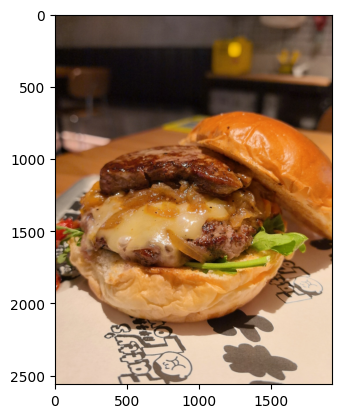

In [9]:
img = load_dataset.load_image_from_gcs(labels_csv.loc[0, "image_path"])
plt.imshow(img)
plt.show()